In [2]:
import csv
import pandas as pd
import numpy as np
import sys
import gzip
from warnings import warn

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import hdbscan

from mpl_toolkits.mplot3d import Axes3D

from biopandas.pdb import PandasPdb

## Костыльное прочтение pdb

In [3]:
w = pd.read_csv('allwater.pdb', sep="  ", header = None, names=[0, 1, 2, 3, 4, 5,6, 'x', 'y', 'z', 'z1', 7, 8])
w.loc[(w.x.isna() == True), ['x', 'y', 'z', 'z1']] = w.loc[(w.x.isna() == True), ['x',
                                                                                  'y', 'z', 'z1']].apply(lambda x: x.shift(-1), axis=1)
w[['x', 'y', 'z']] = w[['x', 'y', 'z']].astype(float)
train = w[['x', 'y', 'z']]

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


## 2D-Scatterplot

In [4]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(w[['x', 'y', 'z']]), columns=('x', 'y', 'z'))

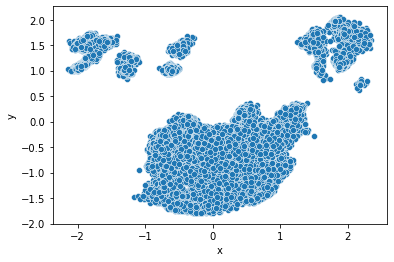

In [5]:
sns.scatterplot(data=X, x=X['x'], y=X['y'])

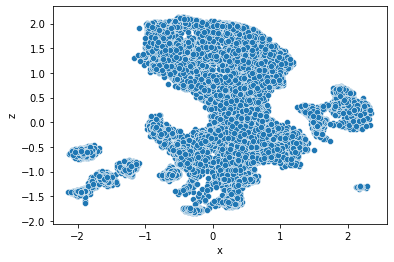

In [6]:
sns.scatterplot(data=X, x=X['x'], y=X['z'])

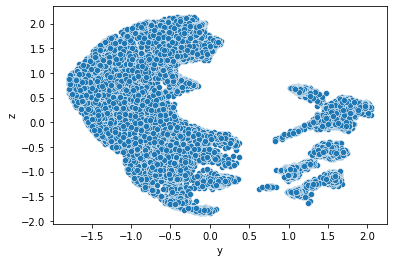

In [7]:
sns.scatterplot(data=X, x=X['y'], y=X['z'])

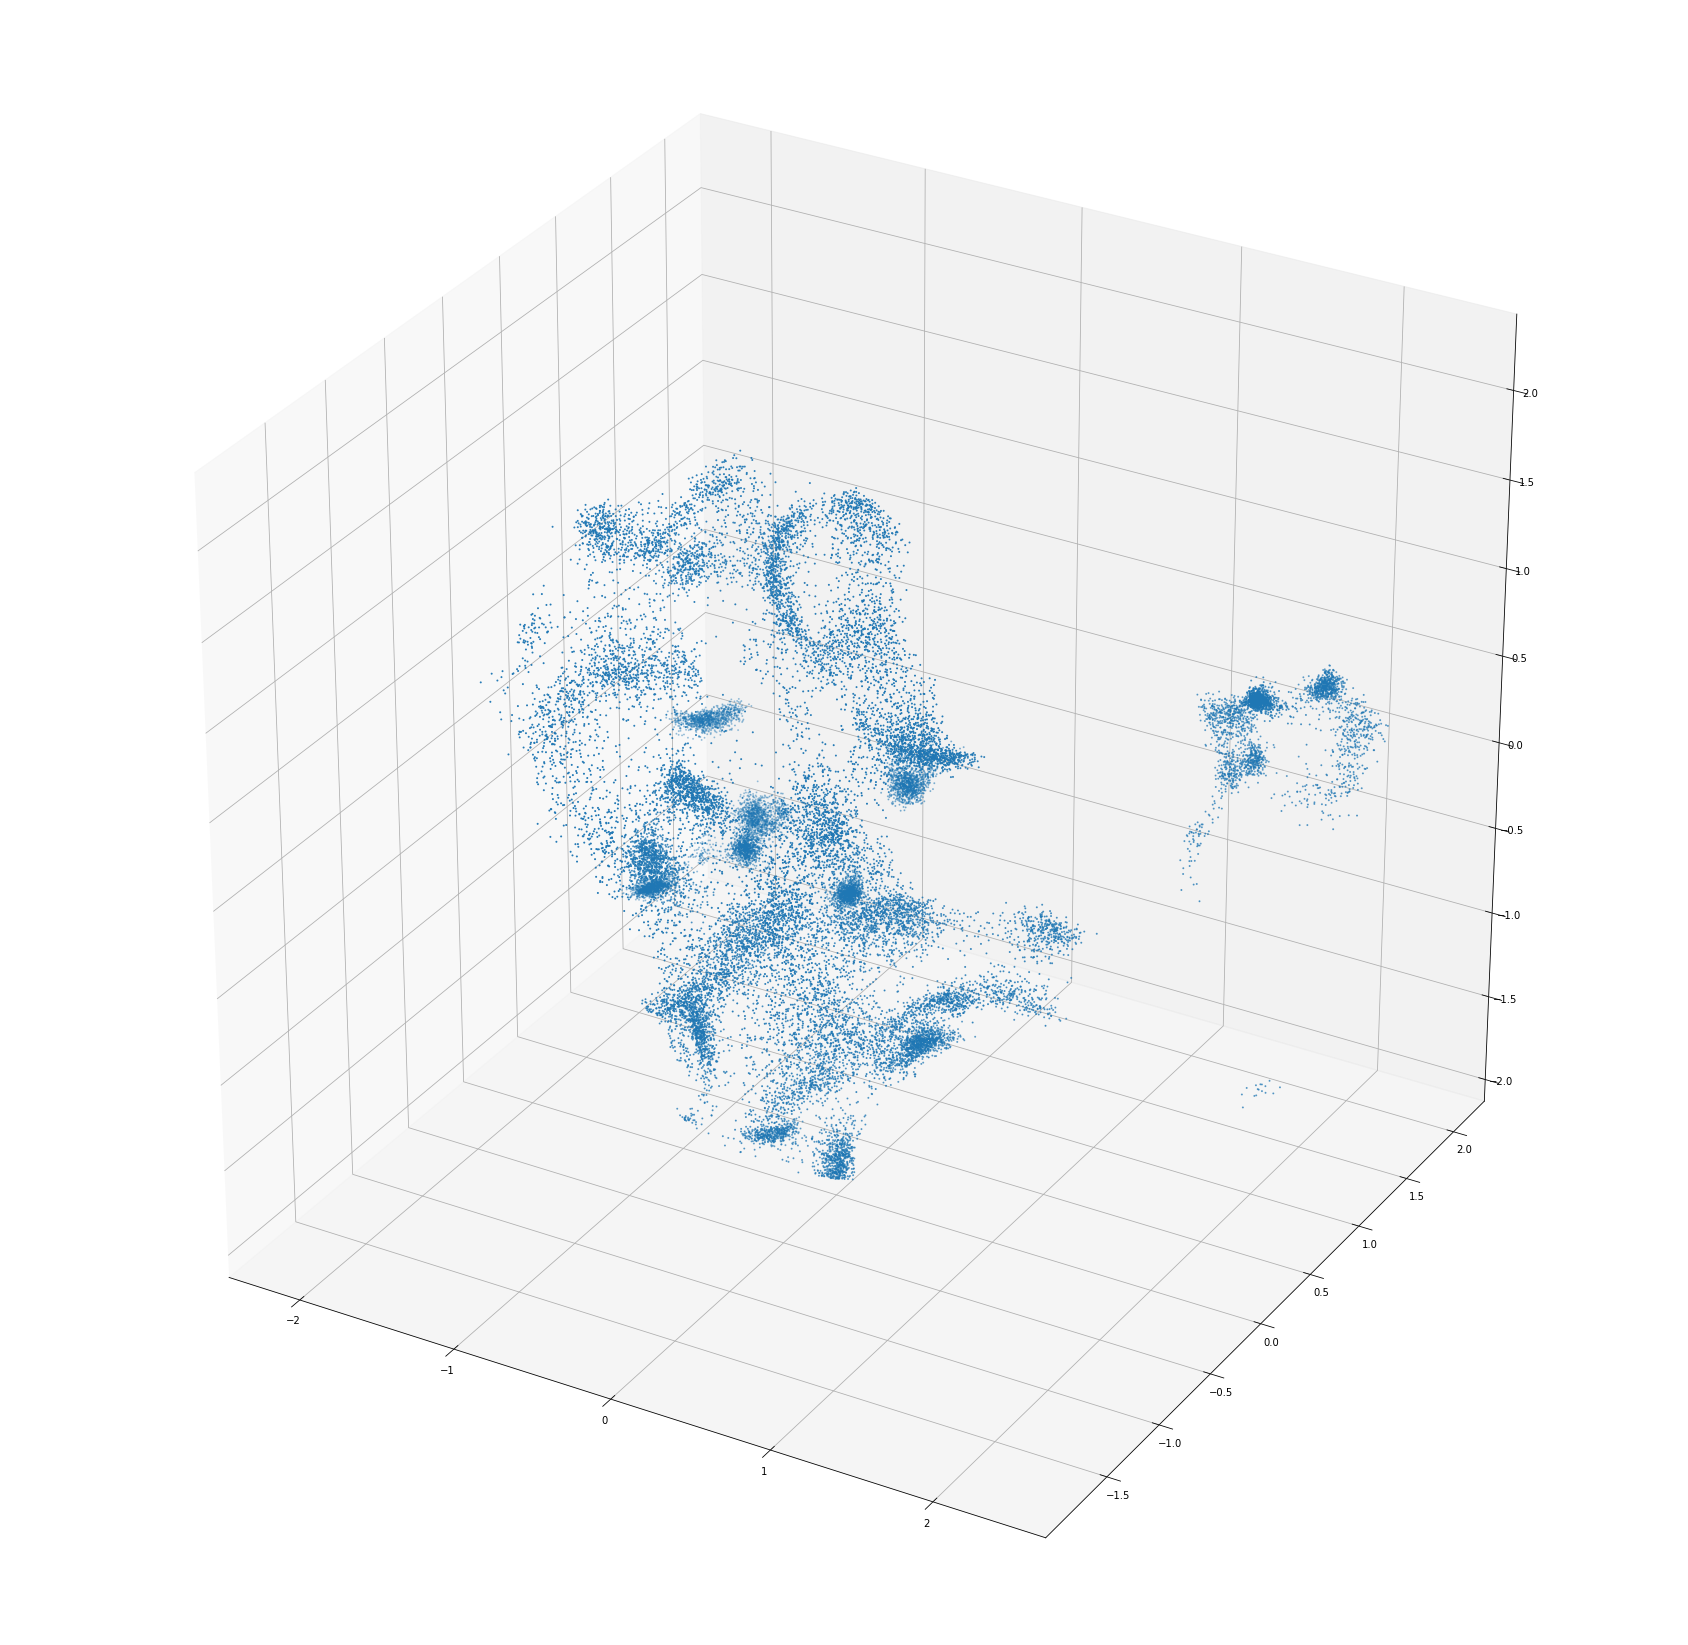

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(30, 30))
plt
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.x, X.y,
           X.z, s=1)

## HDBSCAN after validation

C:\Users\grish\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


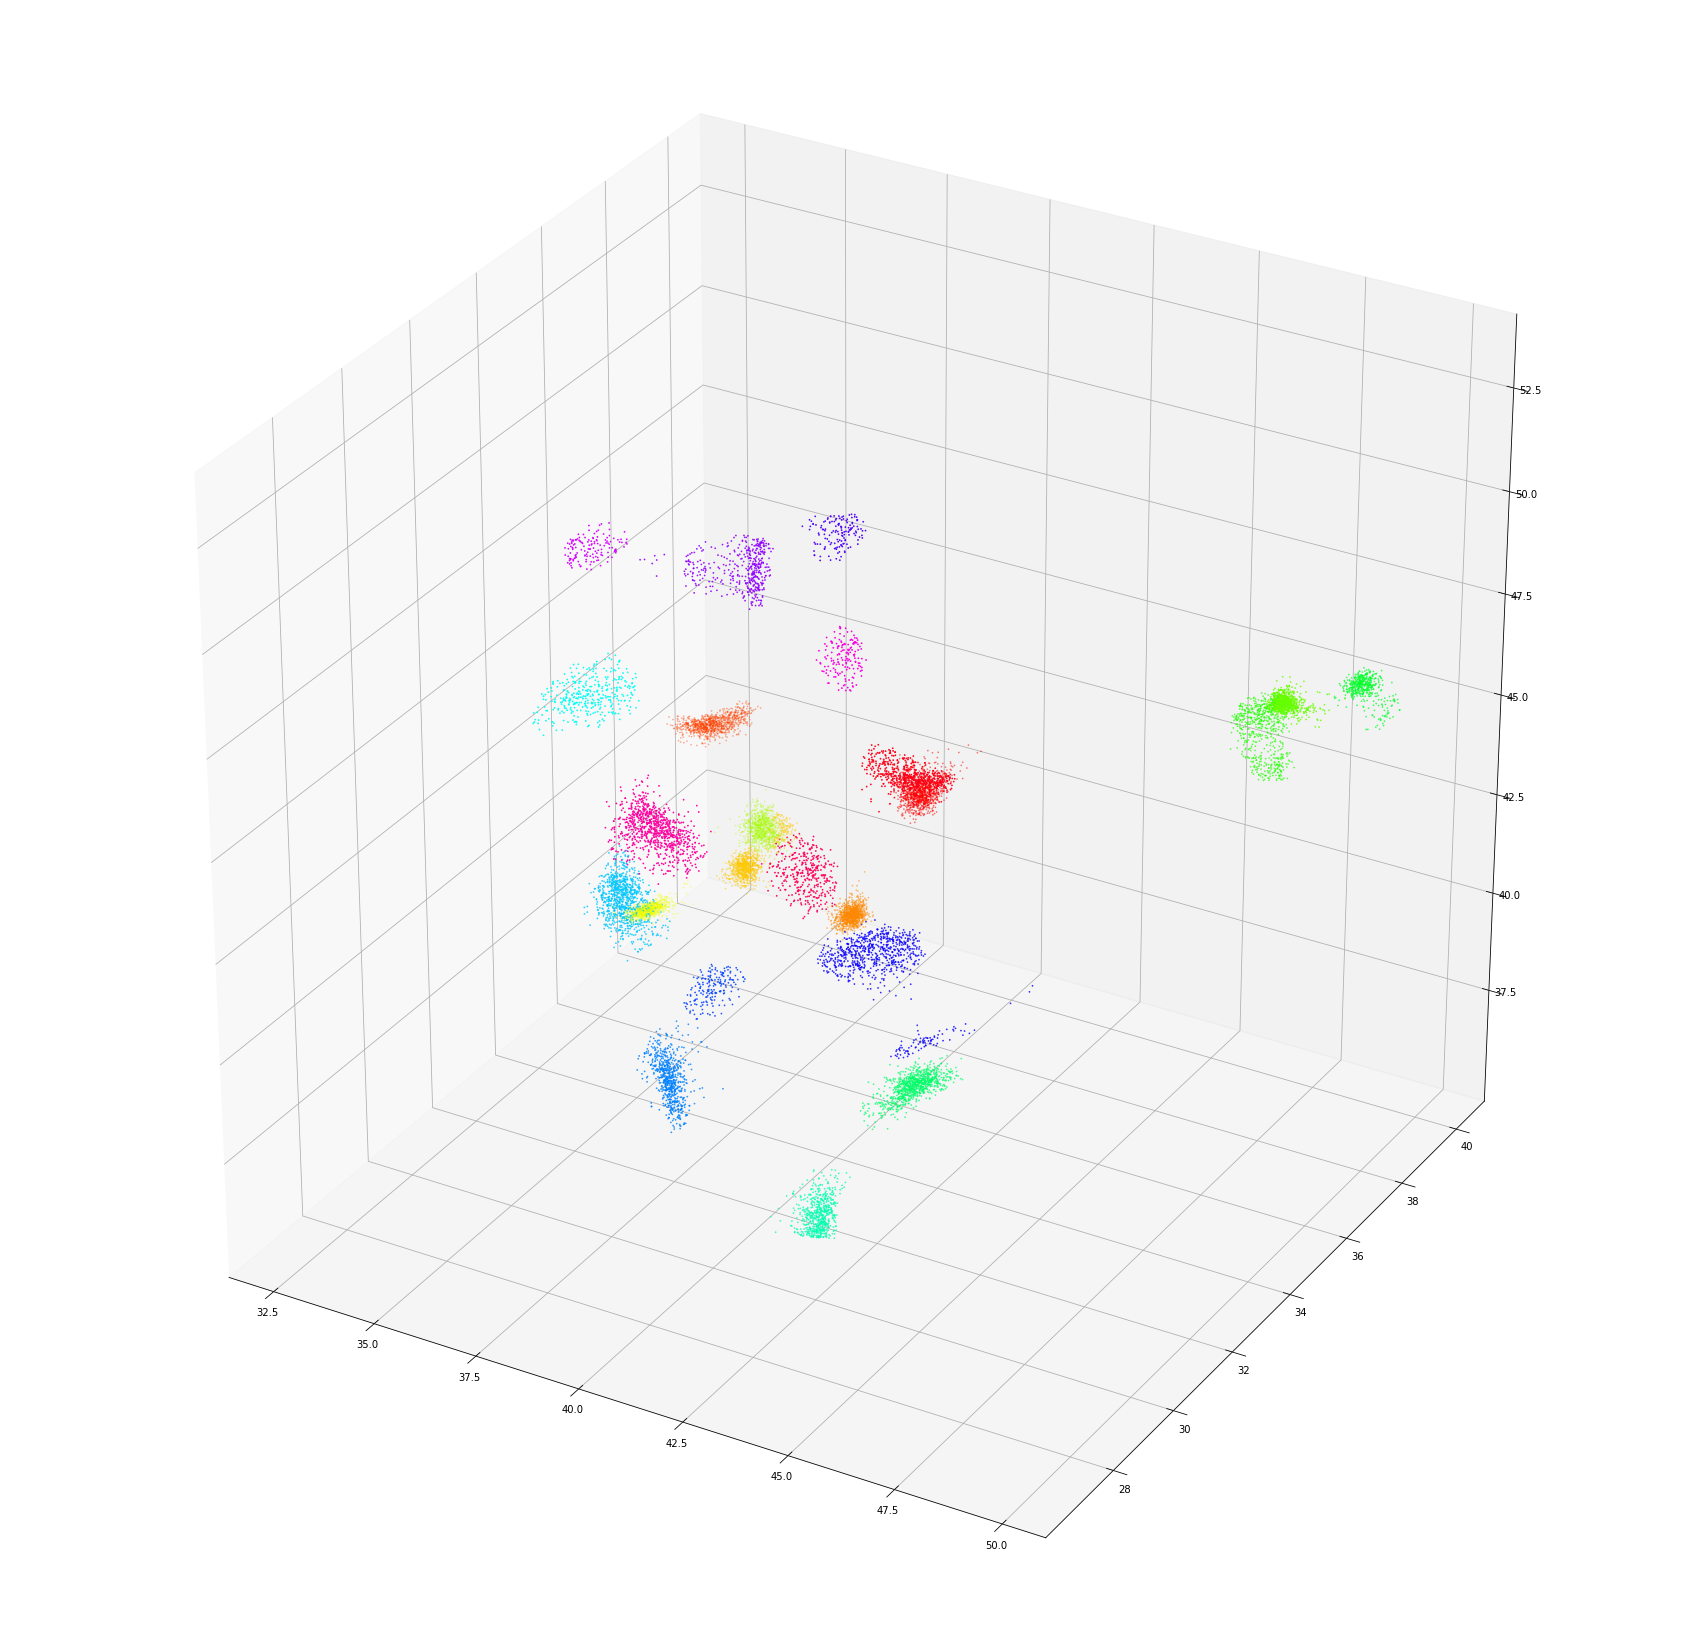

22


In [8]:
from mpl_toolkits.mplot3d import Axes3D
clusterer = hdbscan.HDBSCAN(min_cluster_size=100,
                            min_samples=450,
                            cluster_selection_epsilon=0.5,
                            cluster_selection_method='leaf',
                            leaf_size=150,
                           )
clusterer.fit(train[['x', 'y', 'z']])
train['cl'] = clusterer.labels_
train_d = train[train['cl'] != -1]
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_d.x, train_d.y,
           train_d.z, c=train_d.cl, s=0.6, cmap='hsv')
plt.show()
print(train['cl'].max())

### HDBSCAN decision tree

(3, 0)

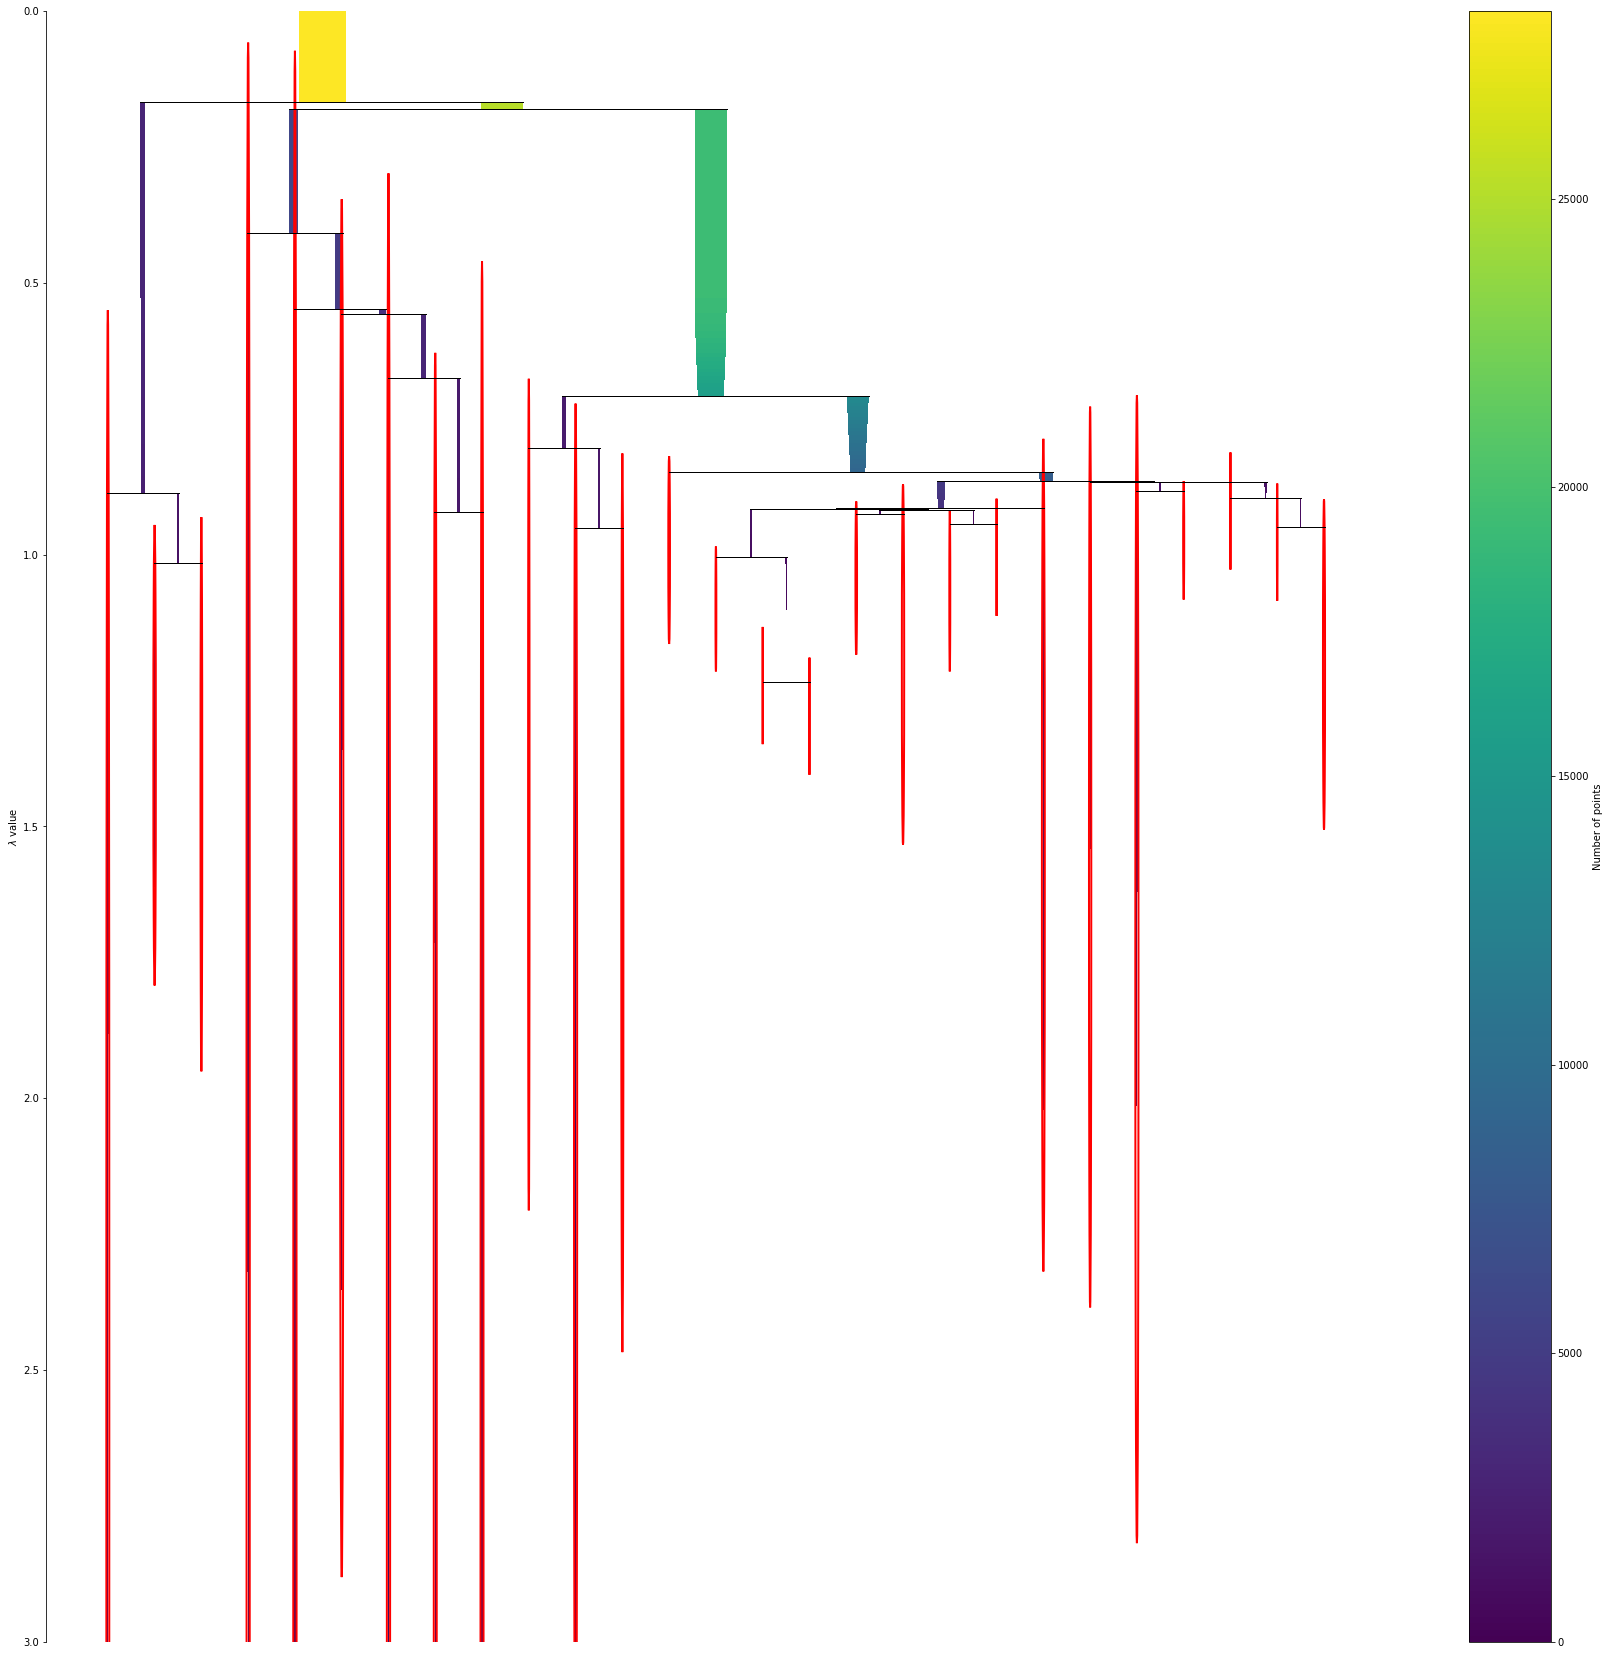

In [127]:
fig = plt.figure(figsize=(30, 30))

clusterer.condensed_tree_.plot(select_clusters=True,
    #label_clusters=True
                              )
plt.ylim(3, 0)

## DBSCAN after validation

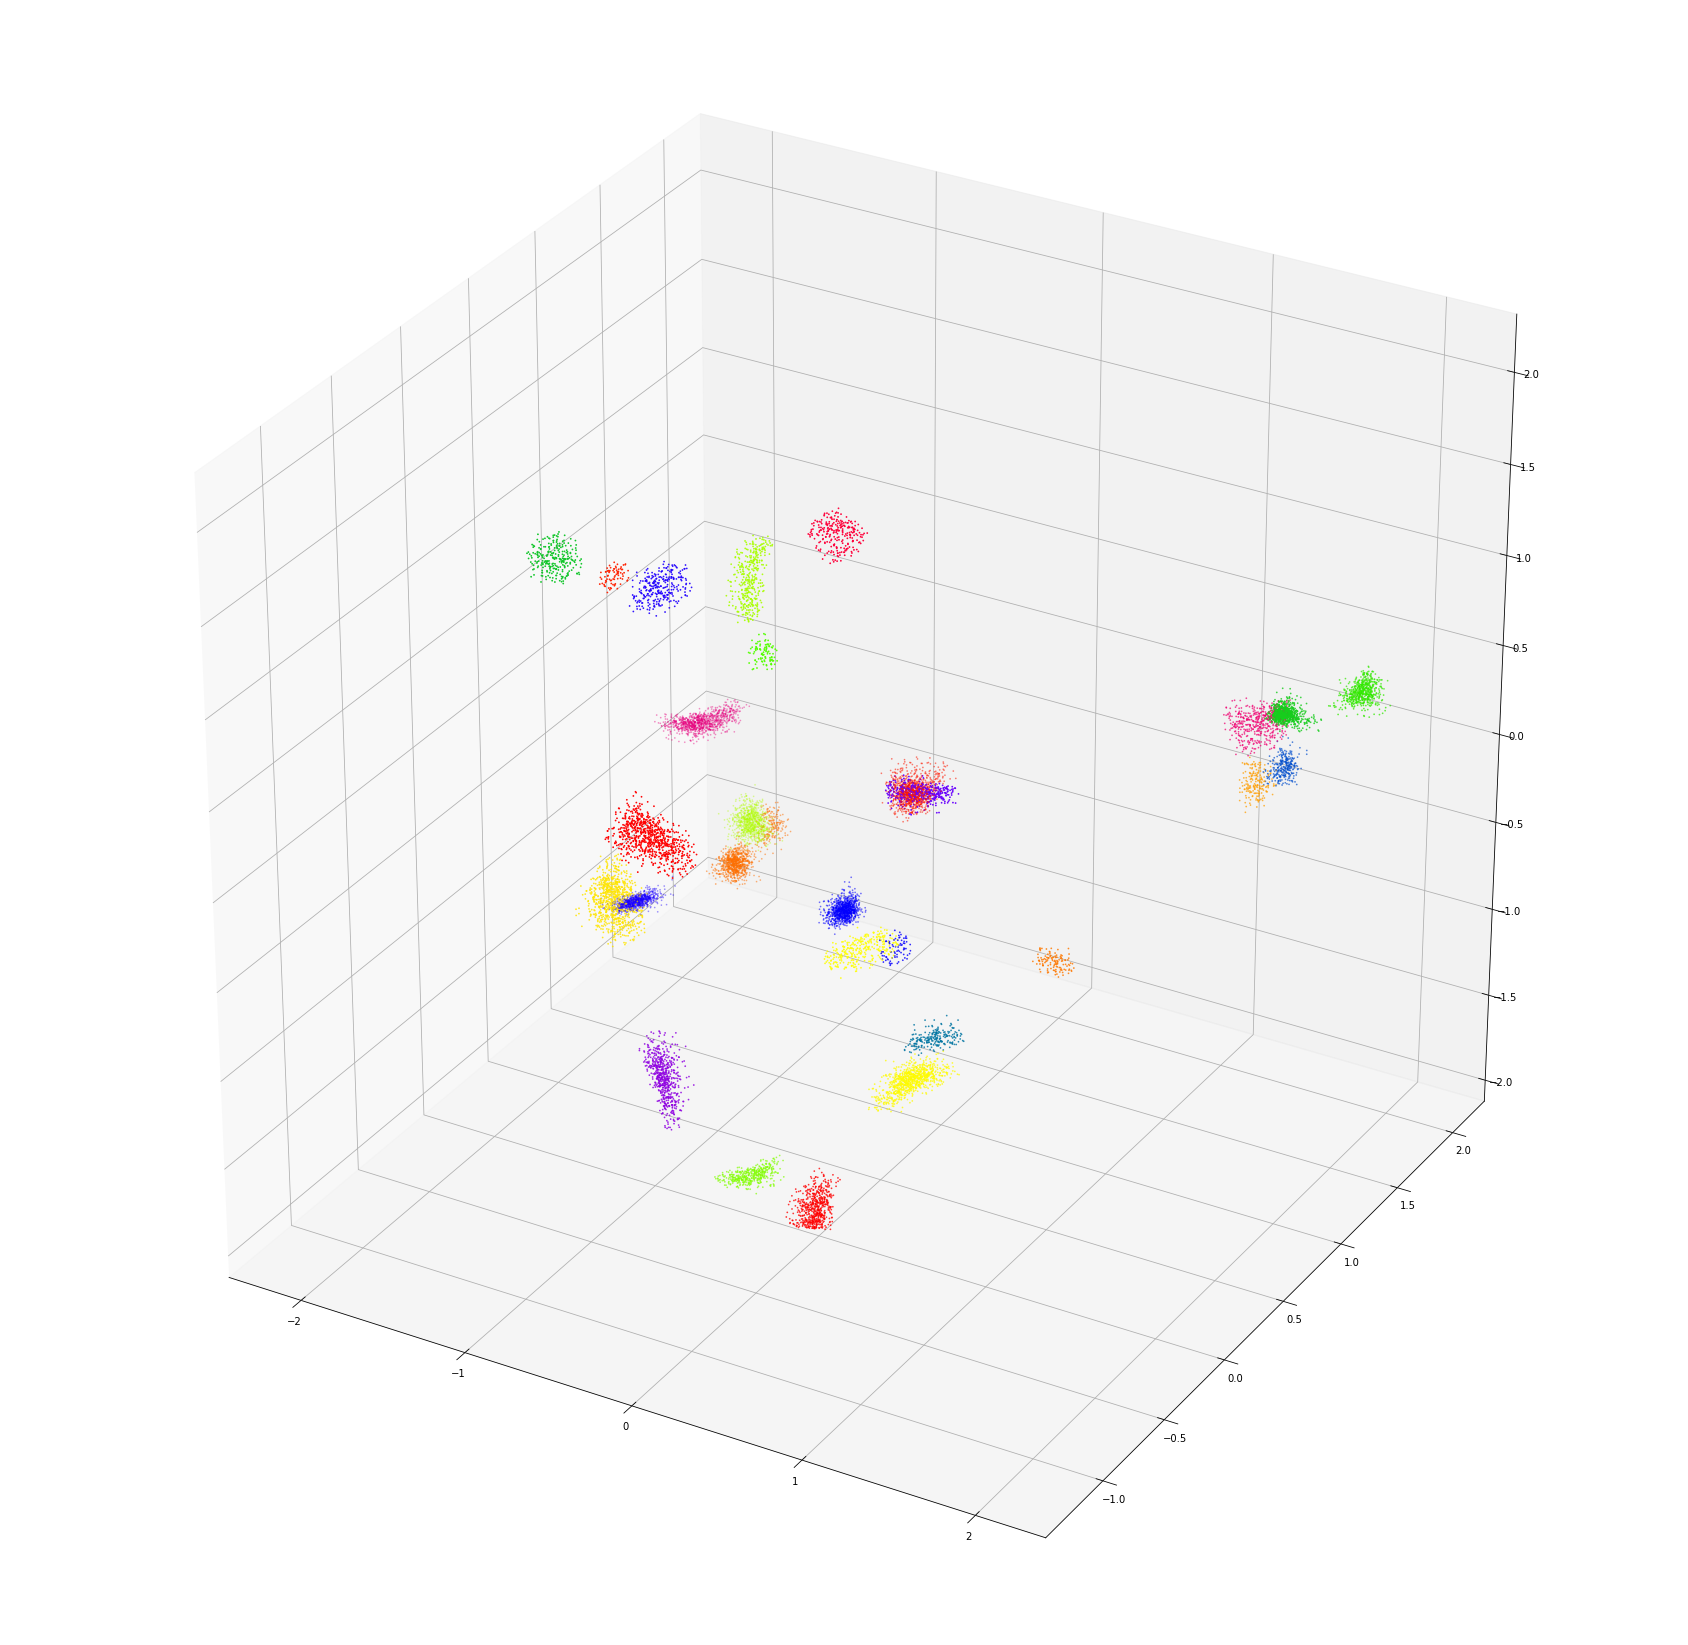

27


In [265]:
for i in range(10, 150, 10):
    for j in range(10, 150, 10):

        db = cluster.DBSCAN(eps=0.08, min_samples=80, leaf_size=30)
        db.fit(X)
        (db.labels_).max()
        X['cl'] = db.labels_
        X_d = X[X['cl'] != -1]
        fig = plt.figure(figsize=(30, 30))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_d.x, X_d.y,
                   X_d.z, c=X_d.cl, s=0.6, cmap='prism')
        plt.show()
        print(X['cl'].max())

In [9]:
def topdb(x, name):
    f = open('allwater.pdb')
    li = f.readlines()
    ddf = []
    for i in li:
        ddf.append(i.split())
    cent = pd.DataFrame(ddf)
    cent = cent[1:len(x['cl'].unique())]
    
    cent[5] = x.groupby('cl')[['x', 'y', 'z']].mean()['x']
    cent[6] =  x.groupby('cl')[['x', 'y', 'z']].mean()['y']
    cent[7] =  x.groupby('cl')[['x', 'y', 'z']].mean()['z']
    
    cent[1] = cent[1].apply(lambda x: (' '+x) if (len(str(x)) == 1) else x)
    cent[5] = cent[5].apply(lambda x: '%.3f'%(x))
    cent[6] = cent[6].apply(lambda x: '%.3f'%(x))
    cent[7] = cent[7].apply(lambda x: '%.3f'%(x))
    return (cent[0]+'     '+cent[1]+' '+cent[2]+'  '+cent[3]+' '+cent[4]+'      '+cent[5]+'  '+cent[6]+'  '+cent[7]+'  '+cent[8]+'  '+cent[9]).to_csv(f'{name}.pdb', sep=' ', index=False)

In [320]:
cent_p = topdb(train_d)

In [255]:
cent_p[[0, 1, 4, 5, 6, 7, 8, 9]].to_csv('wat.pdb', sep=' ', header=False, index=False)